# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [27]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [28]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [29]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [30]:
import missingno as msno
msno.bar(X_california,figsize=(12, 6), sort="ascending",fontsize=12, color='yellow')

<Axes: >

Podemos observar que las columnas de datos no tienen valores faltantes, por lo que inferimos que el set de datos brindado está curado y listo para ser entrada del modelo.

In [31]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [32]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [33]:
y.shape

(20640,)

In [34]:
print(y_train.shape)
print(y_test.shape)

(16512,)
(4128,)


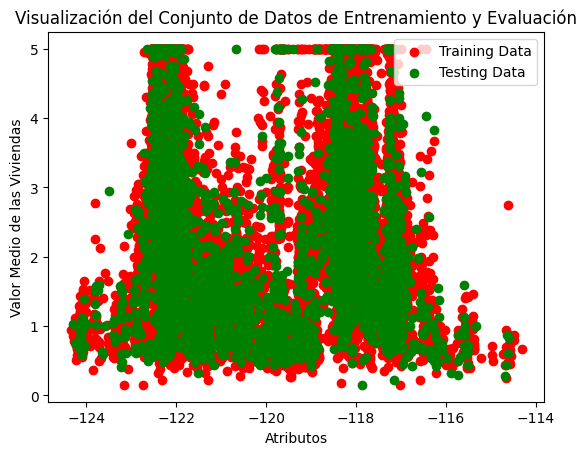

In [35]:
feature_names_initial = california['feature_names']

for feature in feature_names_initial:
    selector_initial = np.array(feature_names_initial) == feature
    data = X_california.loc[:, selector_initial]
# Test train split visualization
plt.scatter(X_train[:, selector_initial], y_train, label='Training Data', color='r')
plt.scatter(X_test[:, selector_initial], y_test, label='Testing Data', color='g')
plt.xlabel('Atributos')
plt.ylabel('Valor Medio de las Viviendas')
plt.title('Visualización del Conjunto de Datos de Entrenamiento y Evaluación')
plt.legend()
plt.show()

In [36]:
#Con esto podemos visualizar que los datos de training y test so

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [37]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [38]:
california['feature_names'][1] == feature

True

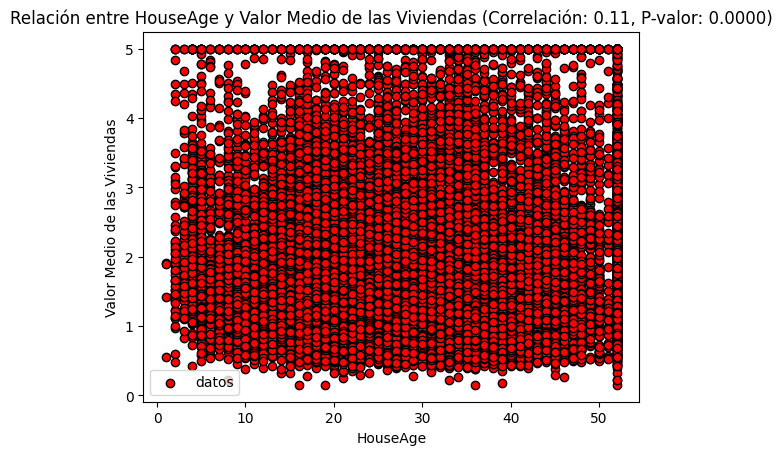

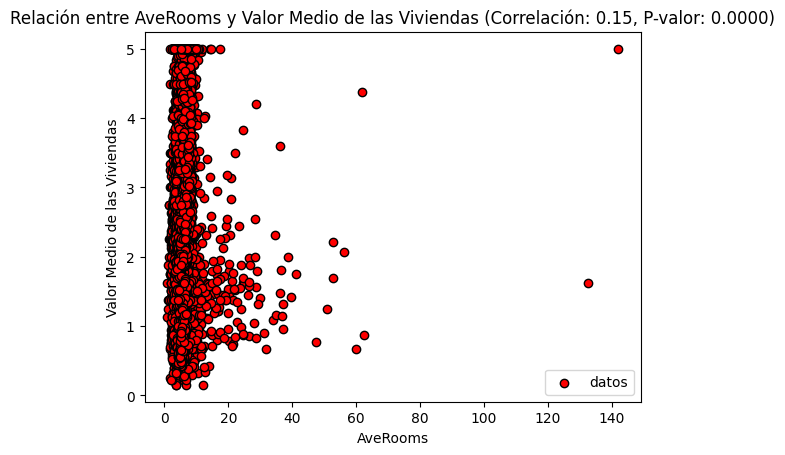

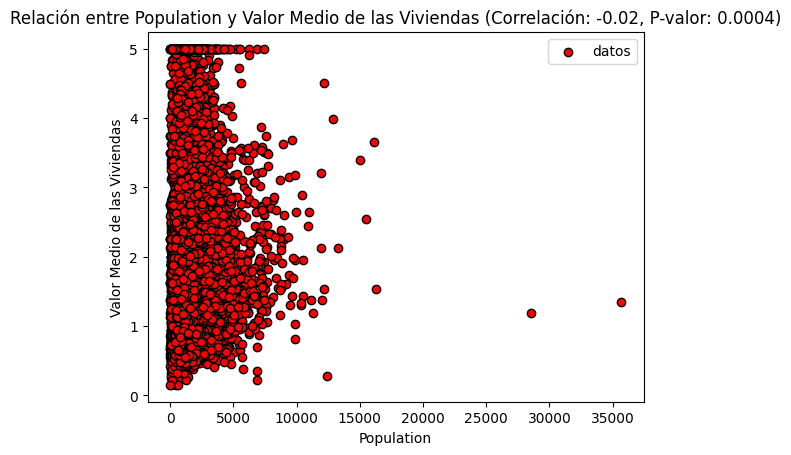

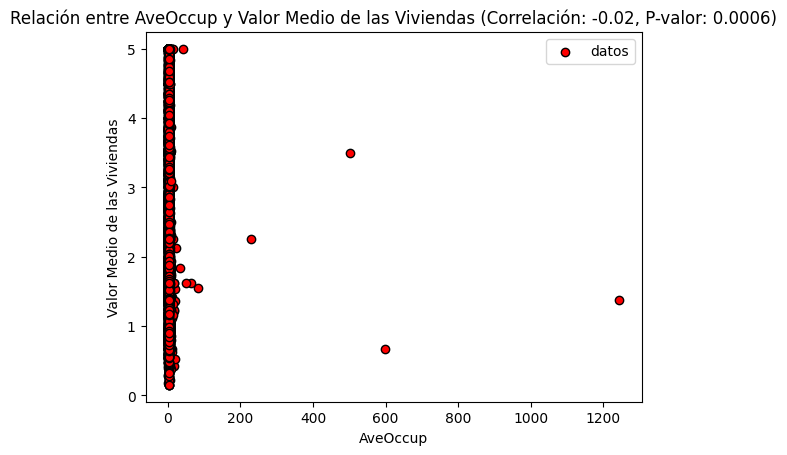

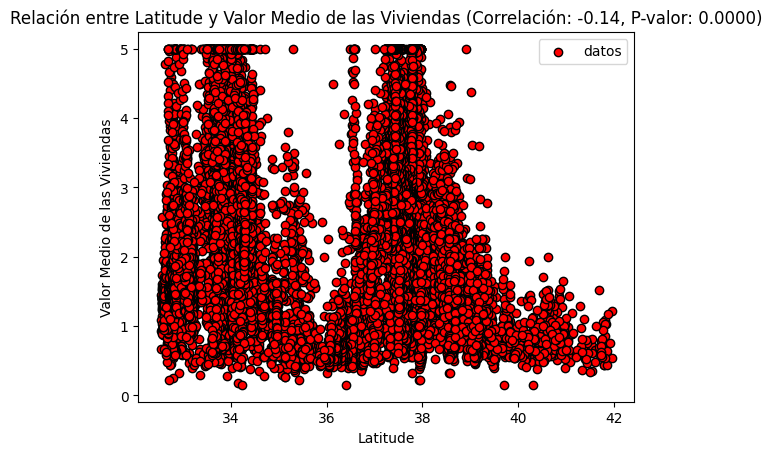

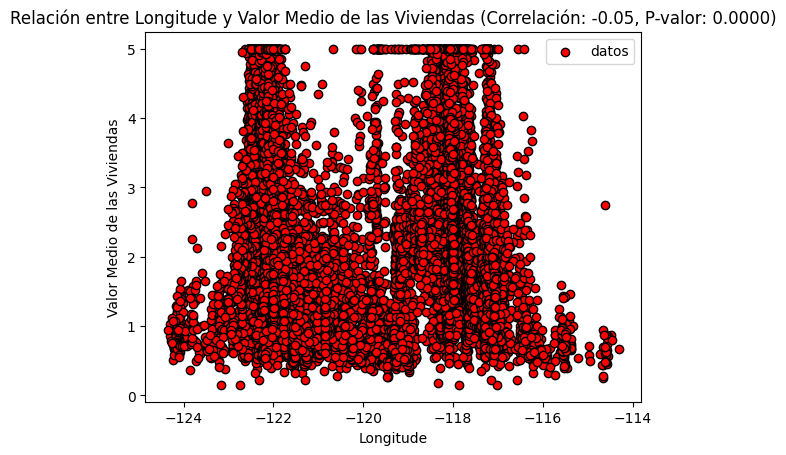

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

feature_names = california['feature_names']

for feature in feature_names:
    selector = np.array(feature_names) == feature
    data = X_california.loc[:, selector]

    # Cálculo del coeficiente de correlación y p-valor
    correlation, p_value = pearsonr(data.values.flatten(), y_california)

    plt.scatter(data, y_california, facecolor=(1, 0, 0), edgecolor="k", label="datos")
    plt.title('Relación entre ' + feature + ' y Valor Medio de las Viviendas (Correlación: {:.2f}, P-valor: {:.4f})'.format(correlation, p_value))
    plt.xlabel(feature)
    plt.ylabel('Valor Medio de las Viviendas')
    plt.legend()
    plt.show()



2- De acuerdo a lo observado en las gráficas, podemos visualizar que las más interesantes para determinar el valor medio de una vivienda son:
    - MedInc: Correlación de 0.69 y p-valor 0.0000: Existe una correlación positiva fuerte (0.69) entre las variables, y el p-valor extremadamente bajo (0.0000) indica que esta correlación es muy poco probable que se deba al azar.
    - HouseAge: Correlación de 0.11 y p-valor 0.0000: Aunque la correlación es positiva (0.11), es relativamente débil en comparación con otras correlaciones mencionadas. Sin embargo, el p-valor muy bajo (0.0000) sugiere que la correlación es estadísticamente significativa.
    - AveRooms: Correlación de 0.15 y p-valor 0.0000: La correlación es positiva (0.15) y ligeramente más fuerte que la anterior. El p-valor muy bajo (0.0000) indica que esta correlación es muy improbable que se deba al azar.
    - AveBedrms: Correlación de -0.05 y p-valor 0.0000: Existe una correlación negativa débil (-0.05) entre las variables, pero el p-valor muy bajo (0.0000) sugiere que esta correlación es estadísticamente significativa.
    - Population: Correlación de -0.02 y p-valor 0.0004: Aunque la correlación es negativa y muy débil (-0.02), el p-valor (0.0004) aún indica una correlación estadísticamente significativa.
    - AveOccup: Correlación de -0.02 y p-valor 0.0006: Al igual que el caso anterior, la correlación es negativa y muy débil (-0.02), pero el p-valor (0.0006) sigue siendo lo suficientemente bajo para considerarla estadísticamente significativa.
    - Latitude: Correlación de -0.14 y p-valor 0.0000: Existe una correlación negativa moderada (-0.14) entre las variables, y el p-valor muy bajo (0.0000) indica que esta correlación es muy poco probable que se deba al azar.
    - Longitude: Correlación de -0.05 y p-valor 0.0000: Al igual que el caso anterior, hay una correlación negativa moderada (-0.05) y un p-valor muy bajo (0.0000), lo que sugiere una correlación significativa.

3- En orden de importancia:
    - HouseAge
    - AveRooms
    - MedInc
    - Latitude
    - Longitude

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [40]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)

#Inicializamos los valores de entrenamiento y test.
X_train_f = X_train[:, selector].copy()
X_test_f = X_test[:, selector].copy()
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [41]:
X_train_f[1]

array([4.3898])

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
model = LinearRegression()
model.fit(X_train_f, y_train)

LinearRegression()

In [44]:
# y_test_pred son los valores que se obtuvieron luego de testear el modelo.
# y_train_pred son los valores que se obtuvieron luego de entrenar el modelo.

y_test_pred = model.predict(X_test_f)# 3. Predecir y evaluar acá.
y_train_pred_linear = model.predict(X_train_f)# 3. Predecir y evaluar acá.

In [61]:
#Calcula el error cuadrático medio (MSE) en ambos conjuntos
mse_train = mean_squared_error(y_train, y_train_pred_linear)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Error cuadrático de datos de entrenamiento: ", mse_train)
print("Error cuadrático de datos de testeo: ", mse_test)


Error cuadrático de datos de entrenamiento:  0.6960681099171515
Error cuadrático de datos de testeo:  0.7214982234014606


In [46]:
# Ajustar la forma de la matriz x
X_ajustada = np.squeeze(X_test_f)
X_ajustada

array([4.1518, 5.7796, 4.3487, ..., 3.2027, 6.1436, 3.3326])

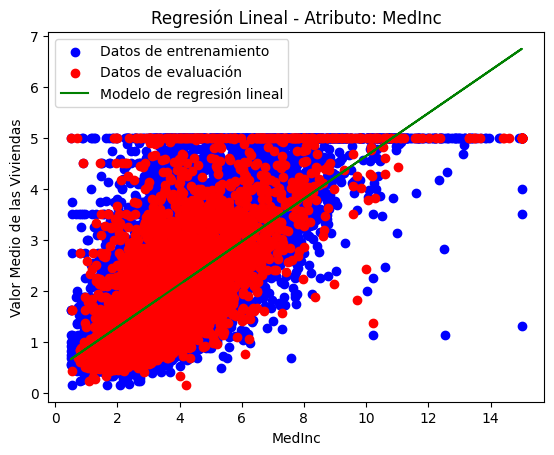

In [47]:
# Graficar los puntos de entrenamiento y evaluación junto con el modelo resultante
plt.scatter(X_train_f, y_train, color='b', label='Datos de entrenamiento')
plt.scatter(X_test_f, y_test, color='r', label='Datos de evaluación')
plt.plot(X_ajustada, y_test_pred, color='g', label='Modelo de regresión lineal')
plt.xlabel(feature)
plt.ylabel('Valor Medio de las Viviendas')
plt.title('Regresión Lineal - Atributo: ' + feature)
plt.legend()
plt.show()

5- El modelo obtenido para este atributo es bastante acertado, su error cuadrático es relativamente bajo y al observar la gráfica vemos que los datos tienden a una recta.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

Ejercicio 4.1:

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

    print(f"Grado {degree}:")
    print(f"  - Error cuadrático medio en entrenamiento: {train_error:.4f}")
    print(f"  - Error cuadrático medio en testing: {val_error:.4f}")


Grado 0:
  - Error cuadrático medio en entrenamiento: 1.3384
  - Error cuadrático medio en testing: 1.3043
Grado 1:
  - Error cuadrático medio en entrenamiento: 0.6961
  - Error cuadrático medio en testing: 0.7215
Grado 2:
  - Error cuadrático medio en entrenamiento: 0.6895
  - Error cuadrático medio en testing: 0.7174
Grado 3:
  - Error cuadrático medio en entrenamiento: 0.6782
  - Error cuadrático medio en testing: 0.7081
Grado 4:
  - Error cuadrático medio en entrenamiento: 0.6781
  - Error cuadrático medio en testing: 0.7080
Grado 5:
  - Error cuadrático medio en entrenamiento: 0.6780
  - Error cuadrático medio en testing: 0.7080
Grado 6:
  - Error cuadrático medio en entrenamiento: 0.6761
  - Error cuadrático medio en testing: 0.7068
Grado 7:
  - Error cuadrático medio en entrenamiento: 0.6737
  - Error cuadrático medio en testing: 0.7026
Grado 8:
  - Error cuadrático medio en entrenamiento: 0.6736
  - Error cuadrático medio en testing: 0.7021
Grado 9:
  - Error cuadrático medio e

Ejericicio 4.2:

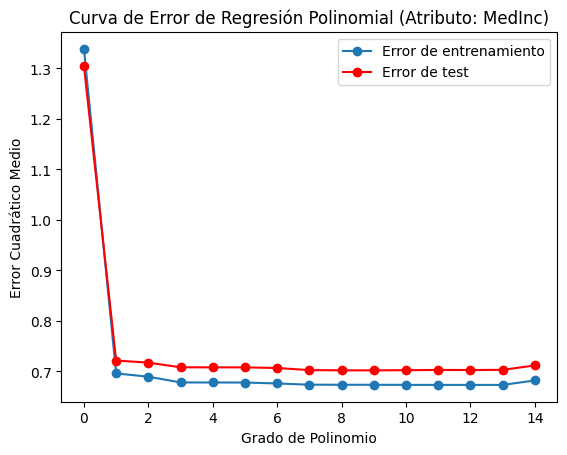

In [49]:
# Graficar curvas de error entrenamiento
plt.plot(degrees, train_errors, marker='o', label='Error de entrenamiento')
plt.plot(degrees, val_errors, marker='o', color='r', label='Error de test')
plt.legend()
plt.xlabel('Grado de Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Error de Regresión Polinomial (Atributo: MedInc)')
plt.show()

Ejercicio 4.3: Se puede ver que el error en entrenamiento siempre baja, pero que en algún punto comienza el sobreajuste, ya que el error en evaluación empieza a subir.

In [50]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [51]:
def create_sinusoidal_data(spread=0.25, data_size=50):
    np.random.seed(0)
    x = np.linspace(0, 1, data_size)
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=spread, size=x.shape)

    return x, y


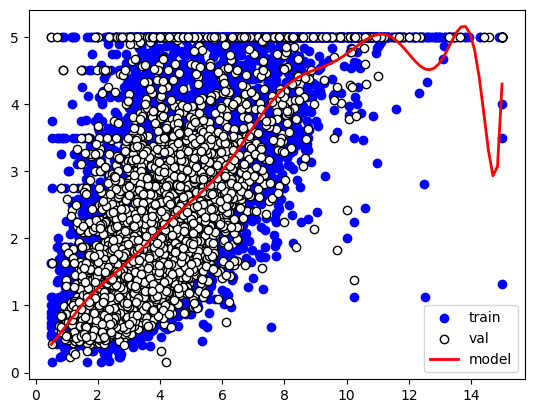

In [52]:
# Extender el rango de los valores de x
x_extended = np.linspace(np.min(X_train_f), np.max(X_train_f), 100)
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x_extended, model.predict(x_extended.reshape(-1, 1)), color="red", label="model", linewidth=2)
plt.legend()
plt.show()


In [53]:
# Seleccionar el modelo con mejor desempeño (menor error)
mejor_grado = degrees[np.argmin(train_errors)]
print(f"El mejor grado de polinomio es: {mejor_grado}")

El mejor grado de polinomio es: 11


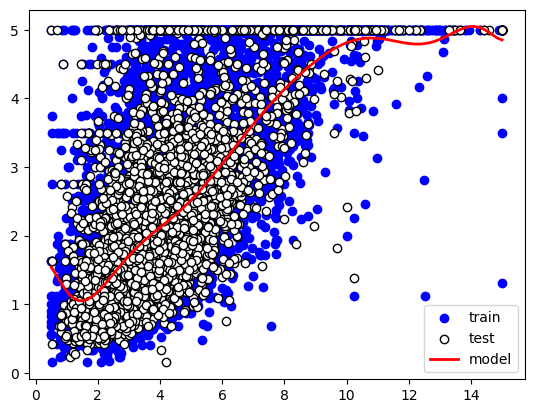

In [54]:
# Entrenar el modelo solo con el mejor grado
pf_mejor_grado = PolynomialFeatures(mejor_grado)
lr_mejor_grado = LinearRegression(fit_intercept=False)
model_mejor_grado = make_pipeline(pf_mejor_grado, lr_mejor_grado)
model_mejor_grado.fit(X_train_f, y_train)


# Extender el rango de los valores de x
x_extended_mejor_grado = np.linspace(np.min(X_train_f), np.max(X_train_f), 100)
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x_extended_mejor_grado, model_mejor_grado.predict(x_extended_mejor_grado.reshape(-1, 1)), color="red", label="model", linewidth=2)
plt.legend()
plt.show()


Ejercicio 4.4 y 4.5
El mejor grado del polinomio es el  11, por lo que el modelo fue entrenado con este grado y lo que se obtuvo es un modelo bastante aproximado a los valores de test.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [55]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [56]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

train_errors_fs = []
val_errors_fs = []

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)

    # predict:
    y_train_pred_fs = model.predict(X_train_fs)
    y_val_pred_fs = model.predict(X_test_fs)

    # evaluate:
    train_error_fs = mean_squared_error(y_train, y_train_pred_fs)
    val_error_fs = mean_squared_error(y_test, y_val_pred_fs)
    train_errors_fs.append(train_error_fs)
    val_errors_fs.append(val_error_fs)

    print(f"Grado {degree}:")
    print(f"  - Error cuadrático medio en entrenamiento: {train_error_fs:.4f}")
    print(f"  - Error cuadrático medio en testing: {val_error_fs:.4f}")

Grado 0:
  - Error cuadrático medio en entrenamiento: 1.3384
  - Error cuadrático medio en testing: 1.3043
Grado 1:
  - Error cuadrático medio en entrenamiento: 1.2837
  - Error cuadrático medio en testing: 1.2561
Grado 2:
  - Error cuadrático medio en entrenamiento: 1.2040
  - Error cuadrático medio en testing: 1.2094
Grado 3:
  - Error cuadrático medio en entrenamiento: 1.1801
  - Error cuadrático medio en testing: 1.1833
Grado 4:
  - Error cuadrático medio en entrenamiento: 1.1594
  - Error cuadrático medio en testing: 1.1737
Grado 5:
  - Error cuadrático medio en entrenamiento: 1.1403
  - Error cuadrático medio en testing: 1.1679
Grado 6:
  - Error cuadrático medio en entrenamiento: 1.1179
  - Error cuadrático medio en testing: 1.1661
Grado 7:
  - Error cuadrático medio en entrenamiento: 1.0916
  - Error cuadrático medio en testing: 1.2675
Grado 8:
  - Error cuadrático medio en entrenamiento: 3.8368
  - Error cuadrático medio en testing: 26.4305
Grado 9:
  - Error cuadrático medio 

In [58]:
# Graficar curvas de error entrenamiento
plt.plot(degrees, train_errors_fs, marker='o')
plt.plot(degrees, val_errors_fs, marker='o', color='r')
plt.xlabel('Grado de Polinomio')
plt.ylabel('Error Cuadrático Medio')
plt.title('Curva de Error de Regresión Polinomial (Atributos: HouseAge y AveRooms)')
plt.show()

In [59]:
# Seleccionar el modelo con mejor desempeño (menor error)
mejor_grado_fs = degrees[np.argmin(train_errors_fs)]
print(f"El mejor grado de polinomio es: {mejor_grado_fs}")

El mejor grado de polinomio es: 7


## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?